# Importing Necessary Libraries

In [25]:
import pandas as pd
import numpy as np
import nltk                                                        # word Tokenization
from nltk.stem.porter import *
import re                                                          # for regular expressions
from wordsegment import load, segment, clean
load()                                                             # loading segment
import matplotlib.pyplot as plt                                    # for visualization
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline

from sklearn import preprocessing


# Reading the dataset and Data Exploration

In [2]:
df = pd.read_csv('Dataset.csv',header = 'infer')      # Loading Dataset

In [3]:
df                                                    # Displying dataset

,tweets,ClassLabels
0,@USER She should ask a few native Americans wh...,OFF
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF
2,Amazon is investigating Chinese employees who ...,NOT
3,"@USER Someone should'veTaken"" this piece of sh...",OFF
4,@USER @USER Obama wanted liberals &amp; illega...,NOT
...,...,...
13235,@USER Sometimes I get strong vibes from people...,OFF
13236,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT
13237,@USER And why report this garbage. We don't g...,OFF
13238,@USER Pussy,OFF


In [4]:
print('number of rows and columns i.e. dimension of the dataset: ',df.shape)
print('\ncolumn names of the dataset: ',df.columns)

number of rows and columns i.e. dimension of the dataset:  (13240, 2)

column names of the dataset:  Index(['tweets', 'ClassLabels'], dtype='object')


## Separating the tweets and class label

In [5]:
ClassLabel = df['ClassLabels']
tweets = df.tweets

### Plotting the class label

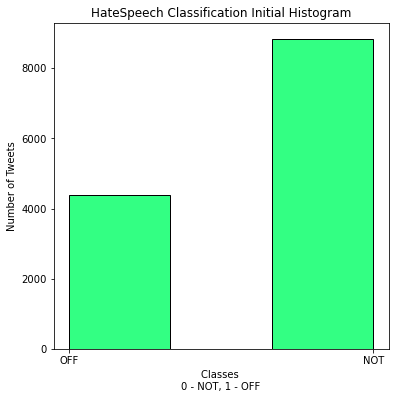

In [12]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.hist(ClassLabel, bins=3, color='#33FF83', density=False, edgecolor='black')
plt.title('HateSpeech Classification Initial Histogram')
plt.xlabel('Classes \n0 - NOT, 1 - OFF')
plt.ylabel('Number of Tweets')
plt.show()

# Preprocessing

In [8]:
print(tweets)

0        @USER She should ask a few native Americans wh...
1        @USER @USER Go home you’re drunk!!! @USER #MAG...
2        Amazon is investigating Chinese employees who ...
3        @USER Someone should'veTaken" this piece of sh...
4        @USER @USER Obama wanted liberals &amp; illega...
                               ...                        
13235    @USER Sometimes I get strong vibes from people...
13236    Benidorm ✅  Creamfields ✅  Maga ✅   Not too sh...
13237    @USER And why report this garbage.  We don't g...
13238                                          @USER Pussy
13239    #Spanishrevenge vs. #justice #HumanRights and ...
Name: tweets, Length: 13240, dtype: object


In [34]:
df

,tweets,ClassLabels
0,@USER She should ask a few native Americans wh...,OFF
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF
2,Amazon is investigating Chinese employees who ...,NOT
3,"@USER Someone should'veTaken"" this piece of sh...",OFF
4,@USER @USER Obama wanted liberals &amp; illega...,NOT
...,...,...
13235,@USER Sometimes I get strong vibes from people...,OFF
13236,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT
13237,@USER And why report this garbage. We don't g...,OFF
13238,@USER Pussy,OFF


In [45]:
corpus = []
#num_urls_regExp = '(https?:\/\/t\.co\/\w+)'
char_regExp = '[,\?:\|]'
#quoteHtml_regExp = '(&#8220;)|(&#8221;)'
#andHtml_regExp = '(&amp;)'
#emo_happy = '[&#...[514;]$]+|[&#...[513;]$]+'
for i in range(0, len(tweets)):
    tweetsUpdated = re.sub(char_regExp, ' ',tweets[i]).split()               # 3.1.1 - removing ,:|?
    tweetsUpdated = " ".join(tweetsUpdated)                               # joining the string after split
    tweetsUpdated = " ".join(tweetsUpdated)                               # joining the string after split
    tweetsUpdated = segment(tweetsUpdated)
    tweetsUpdated = " ".join(tweetsUpdated)     
    corpus.append(tweetsUpdated)                                          # Inserting the updated tweets into a corpus i.e. list of words

In [46]:
corpus[1]

'user user go home your edrunkusermagatrump2020 url'

In [47]:
df1 = pd.DataFrame(corpus)

## One Hot Encoding 

In [26]:
le = preprocessing.LabelEncoder()   #Label Encoder is use to convert categorical label data into numerical labels.



In [57]:
le.fit(ClassLabel)

ClassLabel=le.transform(ClassLabel)     #Encoding 1 for Offensive, 0 for non offensive.

In [48]:
df1['ClassLabel'] = ClassLabel 

In [58]:
df1        # Displaying Encoded Class Labels

,tweets,ClassLabel
0,users he should ask a few native americans wha...,1
1,user user go home your edrunkusermagatrump2020...,1
2,amazon is investigating chinese employees who ...,0
3,user someone shouldve taken this piece of shit...,1
4,user user obama wanted liberals amp illegals t...,0
...,...,...
13235,user sometimes i get strong vibes from people ...,1
13236,benidorm creamfields maga not too shabby of a ...,0
13237,user and why report this garbage we dont give ...,1
13238,user pussy,1


In [53]:
df1.columns = ['tweets','ClassLabel']

In [62]:
df1.to_csv(r'C:\Users\itcomplex\Desktop\Final presenation SIC\UpdatedDataset.csv', index = False, header=True)   # Saving Cleaned tweets in a seperate file